In [57]:
# Diffient activation

In [58]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras import optimizers

In [59]:
# Get data
Data = pd.read_csv('iris.csv',header = None)


# Variables
[m,n] = Data.shape
fn = n - 1

trainNum = int(m * 0.7)

# Shuffle data
Data = Data.sample(frac=1).reset_index(drop=True)
# Seperate data into X y
DataX = Data.iloc[:,0:fn]
DataY = Data.iloc[:,fn]

# Seperate data into train test
trainX = DataX.iloc[0:trainNum,:].values
trainY = DataY.iloc[0:trainNum].values
testX = DataX.iloc[trainNum:,].values
testY = DataY.iloc[trainNum:,].values

In [60]:
# Create none activation models 
model_none = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 100, 
                          activation = None, 
                          input_shape=(4,), 
                          kernel_initializer = tf.initializers.RandomUniform(),
                          kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(units = 100, 
                          activation = None,                           
                          kernel_initializer = tf.initializers.RandomUniform(),
                          kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(3,activation='softmax')
])

model_none.compile(optimizer = optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['acc'])

none_acc = model_none.fit(trainX, trainY, epochs=100,verbose=0)

In [61]:
''' 
    commonly used activation : relu,selu,sigmoid,softmax,tanh        
'''
# Create relu models 
model_relu = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 100, 
                          activation = tf.nn.relu, 
                          input_shape=(4,), 
                          kernel_initializer = tf.initializers.RandomUniform(),
                          kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(units = 100, 
                          activation = tf.nn.relu,                           
                          kernel_initializer = tf.initializers.RandomUniform(),
                          kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(3,activation='softmax')
])

model_relu.compile(optimizer = optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['acc'])

relu_acc = model_relu.fit(trainX, trainY, epochs=100,verbose=0)

In [62]:
# Create selu models 
model_selu = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 100, 
                          activation = tf.nn.selu, 
                          input_shape=(4,), 
                          kernel_initializer = tf.initializers.RandomUniform(),
                          kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(units = 100, 
                          activation = tf.nn.selu,                           
                          kernel_initializer = tf.initializers.RandomUniform(),
                          kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(3,activation='softmax')
])

model_selu.compile(optimizer = optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['acc'])

selu_acc = model_selu.fit(trainX, trainY, epochs=100,verbose=0)

In [63]:
# Create sigmoid models 
model_tanh = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 100, 
                          activation = tf.nn.tanh, 
                          input_shape=(4,), 
                          kernel_initializer = tf.initializers.RandomUniform(),
                          kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(units = 100, 
                          activation = tf.nn.tanh,                           
                          kernel_initializer = tf.initializers.RandomUniform(),
                          kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(3,activation='softmax')
])

model_tanh.compile(optimizer = optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['acc'])

tanh_acc = model_tanh.fit(trainX, trainY, epochs=100,verbose=0)

In [64]:
# Create tanh models 
model_sigmoid = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 100, 
                          activation = tf.nn.tanh, 
                          input_shape=(4,), 
                          kernel_initializer = tf.initializers.RandomUniform(),
                          kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(units = 100, 
                          activation = tf.nn.tanh,                           
                          kernel_initializer = tf.initializers.RandomUniform(),
                          kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(3,activation='softmax')
])

model_sigmoid.compile(optimizer = optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['acc'])

sigmoid_acc = model_sigmoid.fit(trainX, trainY, epochs=100,verbose=0)

none test accuracy: 0.955555558205
relu test accuracy: 0.955555558205
selu test accuracy: 0.955555558205
sigmoid test accuracy: 0.955555558205
sigmoid test accuracy: 0.955555558205


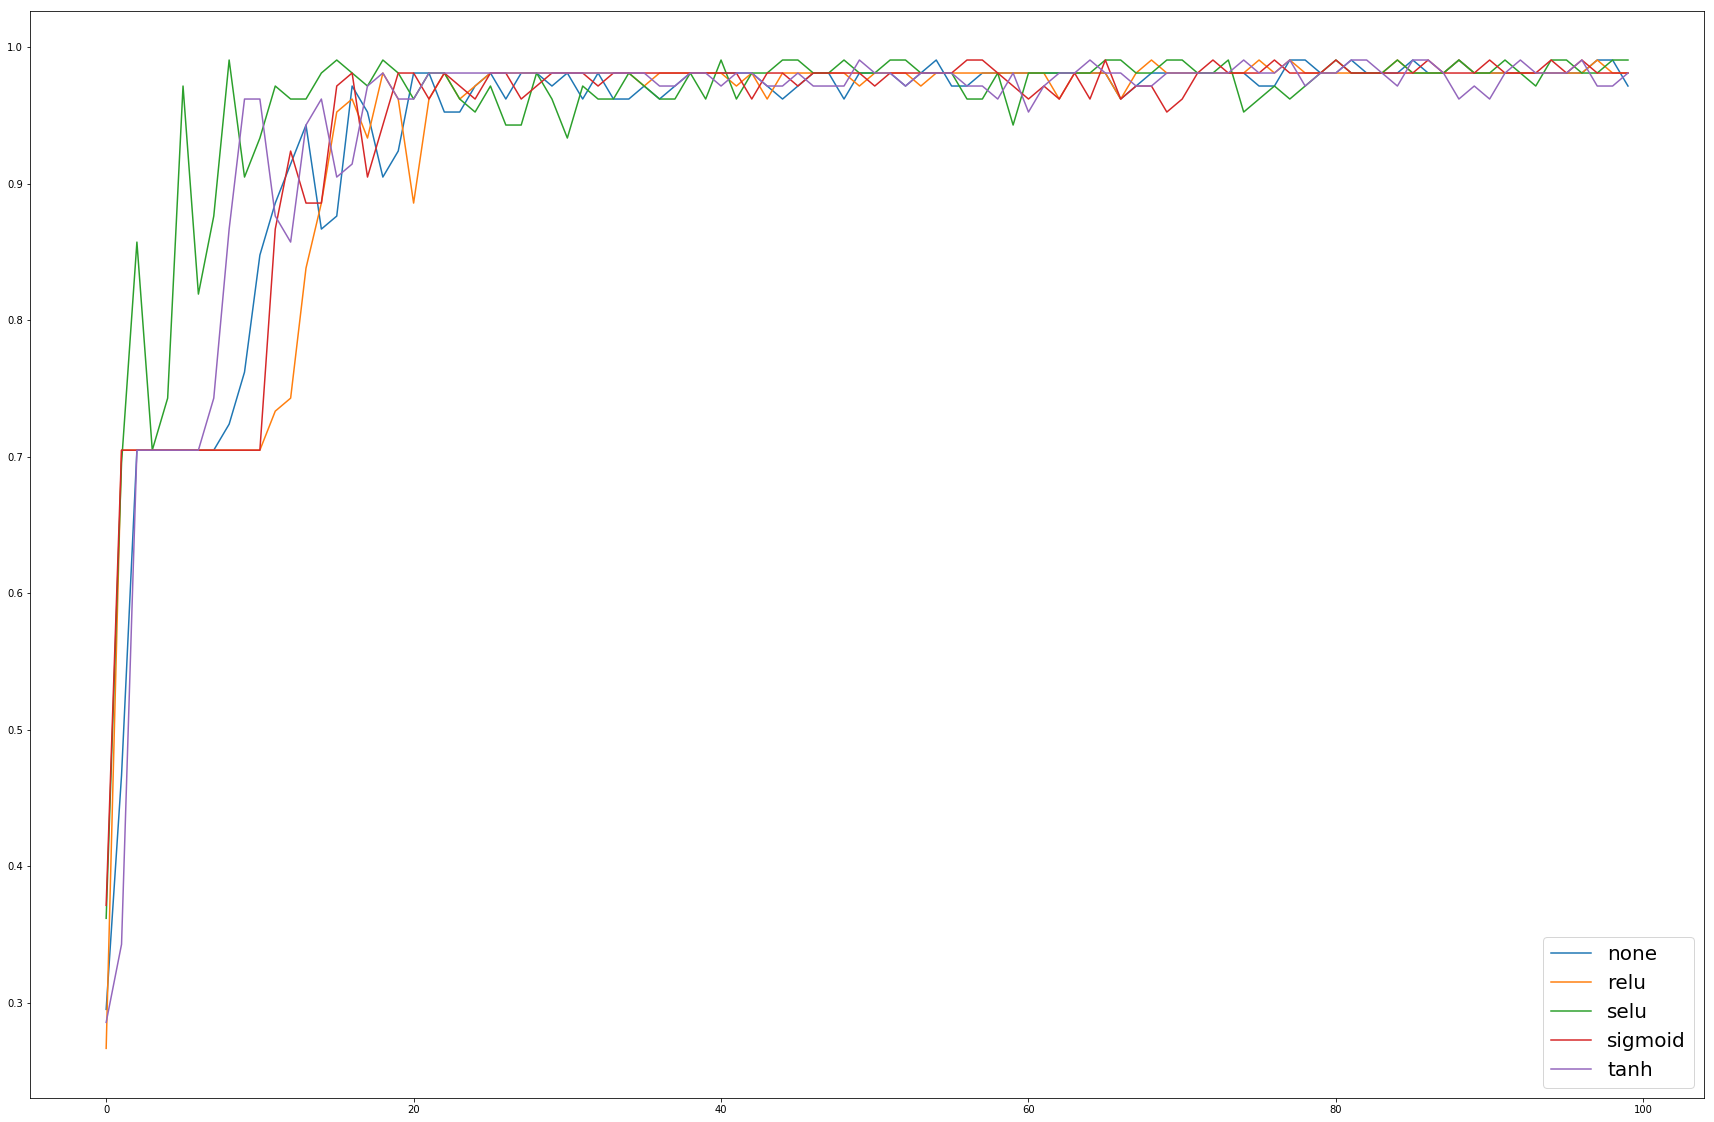

In [66]:
plt.figure(figsize=(30,20));
plt.plot(none_acc.history["acc"],label ='none')
plt.plot(relu_acc.history["acc"],label ='relu')
plt.plot(selu_acc.history["acc"],label ='selu')
plt.plot(sigmoid_acc.history["acc"],label ='sigmoid')
plt.plot(tanh_acc.history["acc"],label ='tanh')
plt.legend(fontsize = 20)
#plt.legend(loc='center left',bbox_to_anchor=(1, 1))
test_loss, test_acc_none = model_none.evaluate(testX,  testY, verbose=0)
test_loss, test_acc_relu = model_relu.evaluate(testX,  testY, verbose=0)
test_loss, test_acc_selu = model_selu.evaluate(testX,  testY, verbose=0)
test_loss, test_acc_sigmoid = model_sigmoid.evaluate(testX,  testY, verbose=0)
test_loss, test_acc_tanh = model_tanh.evaluate(testX,  testY, verbose=0)

print('none test accuracy: {}'.format(test_acc_none))
print('relu test accuracy: {}'.format(test_acc_relu))
print('selu test accuracy: {}'.format(test_acc_selu))
print('sigmoid test accuracy: {}'.format(test_acc_sigmoid))
print('sigmoid test accuracy: {}'.format(test_acc_tanh))